In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv' ,encoding = 'latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5539,ham,Just sleeping..and surfing,NaN,NaN,NaN
2660,ham,Want to finally have lunch today?,NaN,NaN,NaN
1615,ham,Mm i had my food da from out,NaN,NaN,NaN
3559,ham,Lol I know! Hey someone did a great inpersonat...,NaN,NaN,NaN
3395,spam,URGENT! Your Mobile number has been awarded wi...,NaN,NaN,NaN


In [4]:
#1. Data cleaning
#2. EDA
#3. Text Preprocessing
#4. Model building
#5. Evaluation
#6. Deployment

Data Cleaning

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.sample(5)

,v1,v2
2302,ham,We can make a baby in yo tho
5051,ham,"Tick, tick, tick .... Where are you ? I could ..."
1188,ham,All will come alive.better correct any good lo...
1079,ham,Me too watching surya movie only. . .after 6 p...
3922,ham,Okay lor... Will they still let us go a not ah...


In [8]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [9]:
df.sample(5)

,target,text
1087,ham,You can never do NOTHING
39,ham,Hello! How's you and how did saturday go? I wa...
1465,spam,YOU 07801543489 are guaranteed the latests Nok...
4642,ham,Sorry i din lock my keypad.
2242,ham,Nope wif my sis lor... Aft bathing my dog then...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target']= encoder.fit_transform(df['target'])

In [12]:
df.sample(5)

,target,text
3967,0,Did u turn on the heater? The heater was on an...
3643,0,* Thought I didn't see you.
5229,0,It means u could not keep ur words.
802,1,FREE for 1st week! No1 Nokia tone 4 ur mobile ...
2713,0,Nope i'm not drivin... I neva develop da photo...


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.shape

(5169, 2)

EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt

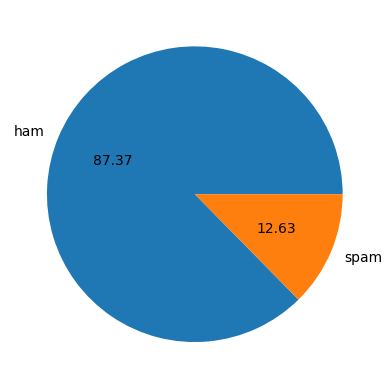

In [20]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
#the data is imbalanced , so we have to balance it

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kushagra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_charecters']= df['text'].apply(len)

In [25]:
#no of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
#no of sentences
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.sample(5)

,target,text,num_charecters,num_words,num_sent
2979,0,What u mean u almost done? Done wif sleeping? ...,141,38,3
3428,0,I don't know jack shit about anything or i'd s...,193,34,1
3343,0,Oh great. I.ll disturb him more so that we can...,52,13,2
3957,0,So i could kiss and feel you next to me...,42,11,1
615,0,"\Happy valentines day\"" I know its early but i...",149,31,2


In [28]:

df[['num_charecters','num_words','num_sent']].describe()

,num_charecters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# ham
df[df['target'] == 0][['num_charecters','num_words','num_sent']].describe()

,num_charecters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# spam
df[df['target'] == 1][['num_charecters','num_words','num_sent']].describe()

,num_charecters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
import seaborn as sns

<Axes: xlabel='num_charecters', ylabel='Count'>

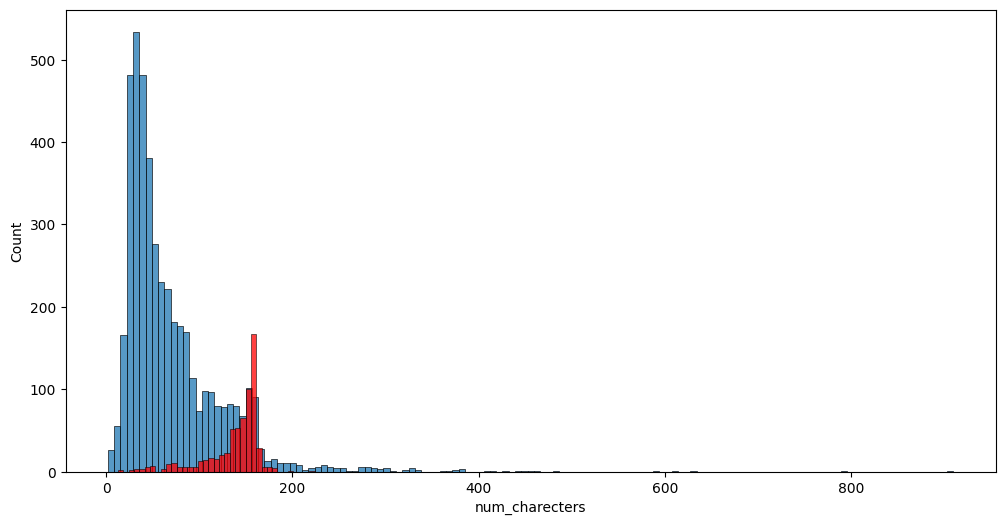

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_charecters'])
sns.histplot(df[df['target'] == 1]['num_charecters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

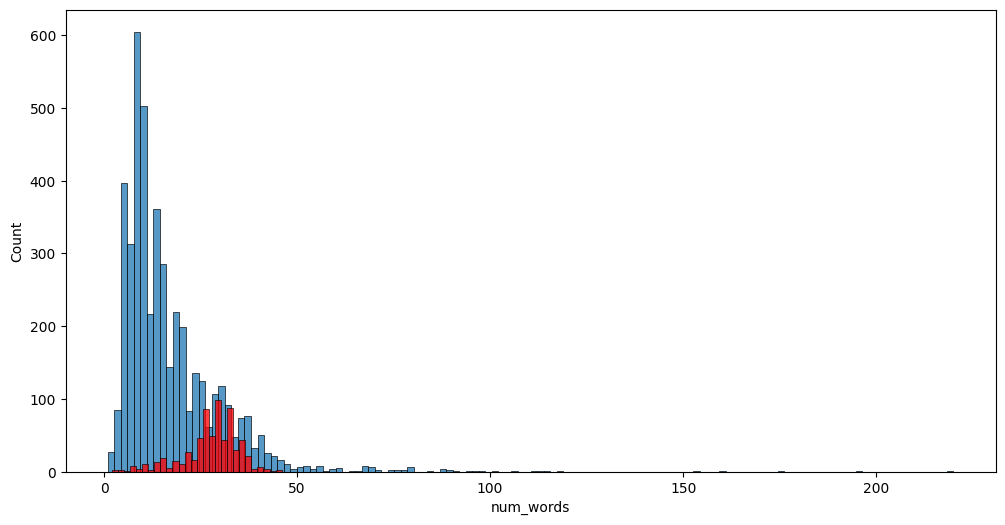

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

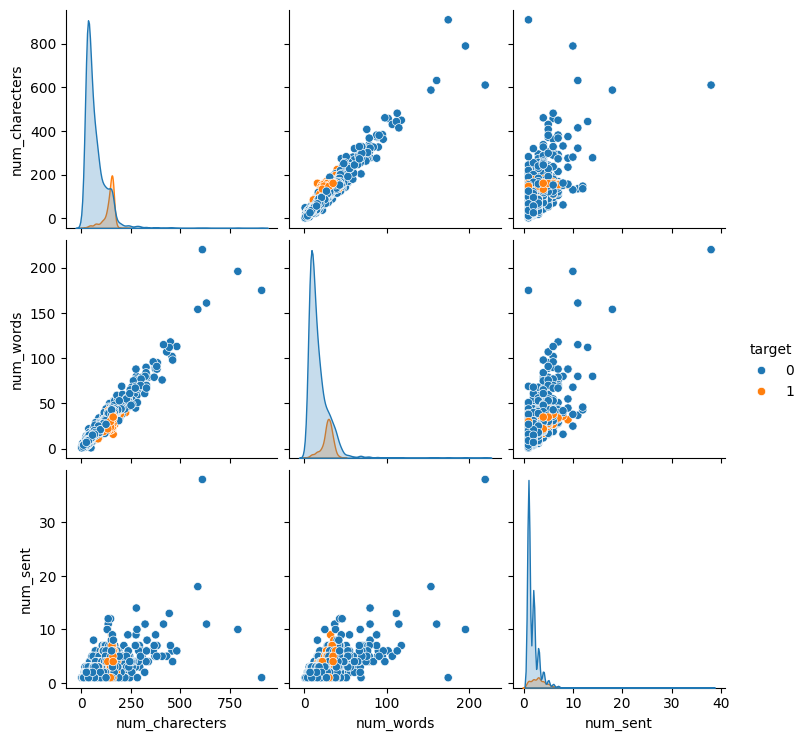

In [34]:
sns.pairplot(df,hue='target')

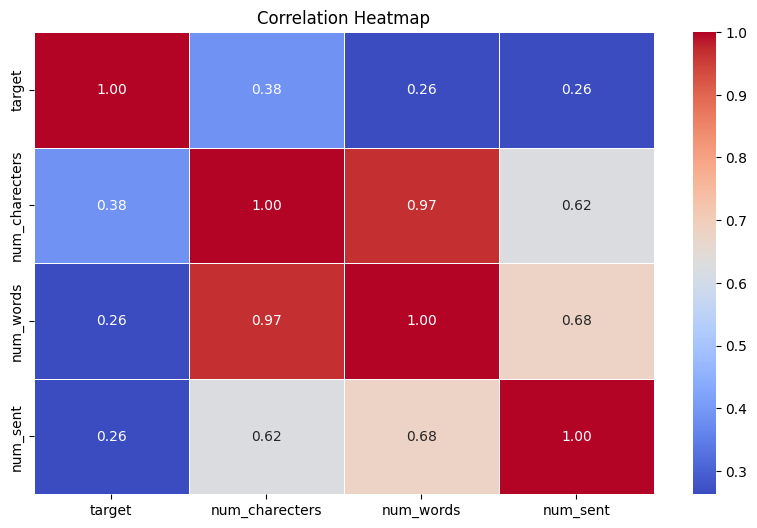

In [35]:
df_numeric = df.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Heatmap")
plt.show()



In [36]:
#this shows that the max correlation is between the num_charecters, so we will use this 

Data Preprocessing

In [37]:
#lower case, tokenization , remove stop words/punc/special char, stemming

In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [39]:
import string
from nltk.corpus import stopwords

In [40]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [41]:
df['transformed_text'] = df['text'].apply(transform_text)

In [42]:
df.head(5)

,target,text,num_charecters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [44]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

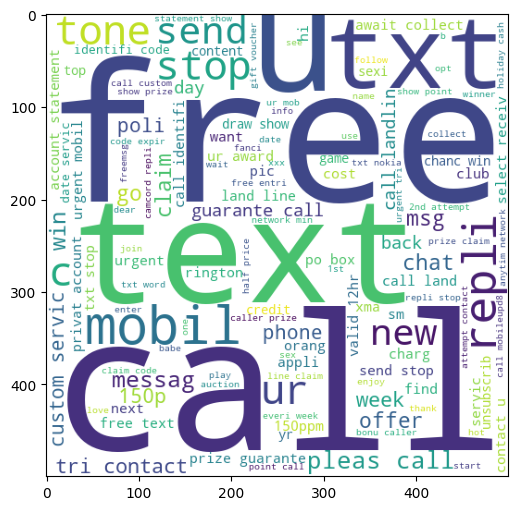

In [45]:

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [46]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

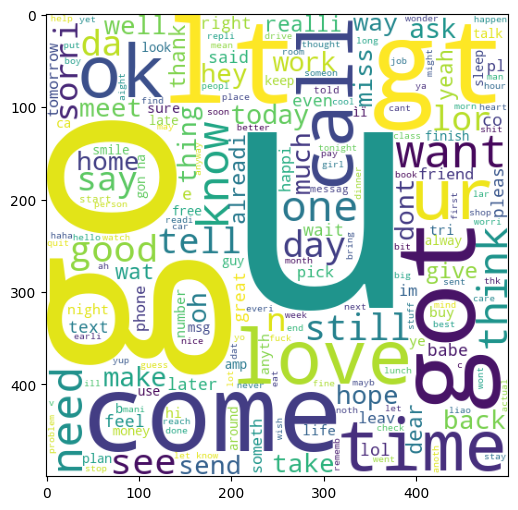

In [47]:

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [48]:
df.head()

,target,text,num_charecters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Model Building

In [51]:
#convert text to vector
#we will use 1st Bag of words

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [75]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [76]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [78]:
X.shape

(5169, 6708)

In [80]:
y = df['target'].values

In [81]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2)

In [84]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [85]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [87]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723897911832946
[[991 139]
 [ 26 137]]
0.4963768115942029


In [88]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9659706109822119
[[1102   28]
 [  16  147]]
0.84


In [89]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9698375870069605
[[1127    3]
 [  36  127]]
0.9769230769230769


In [90]:
#now lets try with TF-Idf vectorizer

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [92]:
X_tf = tfidf.fit_transform(df['transformed_text']).toarray()
y_tf = df['target'].values

In [93]:
X_traintf, X_testtf, y_traintf, y_testtf = train_test_split(X_tf,y_tf, random_state=2)

In [94]:
gnb.fit(X_traintf, y_traintf)
y_pred1 = gnb.predict(X_testtf)
print(accuracy_score(y_testtf,y_pred1))
print(confusion_matrix(y_testtf,y_pred1))
print(precision_score(y_testtf,y_pred1))

0.8662026295436969
[[990 140]
 [ 33 130]]
0.48148148148148145


In [95]:
mnb.fit(X_traintf, y_traintf)
y_pred2 = mnb.predict(X_testtf)
print(accuracy_score(y_testtf,y_pred2))
print(confusion_matrix(y_testtf,y_pred2))
print(precision_score(y_testtf,y_pred2))

0.9729311678267595
[[1130    0]
 [  35  128]]
1.0


In [96]:
bnb.fit(X_traintf, y_traintf)
y_pred3 = bnb.predict(X_testtf)
print(accuracy_score(y_testtf,y_pred3))
print(confusion_matrix(y_testtf,y_pred3))
print(precision_score(y_testtf,y_pred3))

0.9837587006960556
[[1128    2]
 [  19  144]]
0.9863013698630136


In [97]:
#therefore we are getting the pricision score =1 for MNB with TF-IDF

In [98]:
#lets try more algo

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [100]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [101]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [102]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [105]:
train_classifier(svc,X_traintf,y_traintf,X_testtf,y_testtf)

(0.9737045630317092, 0.9777777777777777)

In [106]:

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_traintf,y_traintf,X_testtf,y_testtf)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9737045630317092
Precision -  0.9777777777777777
For  KN
Accuracy -  0.9095127610208816
Precision -  1.0
For  NB
Accuracy -  0.9729311678267595
Precision -  1.0
For  DT
Accuracy -  0.9288476411446249
Precision -  0.8034188034188035
For  LR
Accuracy -  0.9574632637277649
Precision -  0.9655172413793104
For  RF
Accuracy -  0.9767981438515081
Precision -  0.9925925925925926


c:\Users\Kushagra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9636504253673627
Precision -  0.9264705882352942
For  BgC
Accuracy -  0.9590100541376644
Precision -  0.8666666666666667
For  ETC
Accuracy -  0.979891724671307
Precision -  0.9659863945578231
For  GBDT
Accuracy -  0.9528228924980665
Precision -  0.9396551724137931
For  xgb
Accuracy -  0.9698375870069605
Precision -  0.9492753623188406


In [107]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [108]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.909513,1.000000
2,NB,0.972931,1.000000
5,RF,0.976798,0.992593
0,SVC,0.973705,0.977778
8,ETC,0.979892,0.965986
4,LR,0.957463,0.965517
10,xgb,0.969838,0.949275
9,GBDT,0.952823,0.939655
6,AdaBoost,0.963650,0.926471
7,BgC,0.959010,0.866667


In [110]:
#improving the model

In [113]:
#1. change the max_features parameter in Tf-idf
#2. We can also do scaling (MinMaxScaler) but it has reduced the precision
#3. add more data columns

In [114]:
#Now making the pipeline
# text preprocessing-> 

In [115]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))